# Medical Image Analaysis
### Assigment 02: Image Conditioning

- Name:Naren Akash R J
- Roll Number: 2018-111-020

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def retinex_image_enhancement(image, variance):
    image = np.float64(image) + 1.0
    smoothed_image = cv2.GaussianBlur(image, (0, 0), variance)
    retinex_image = np.log10(image) - np.log10(smoothed_image)
    
    unique, count = np.unique(np.int32(retinex_image * 100), return_counts=True)
    
    for u, c in zip(unique, count):
        if u  == 0:
            zero_count = c
            break
            
    low_val = unique[0] / 100.0
    high_val = unique[-1] / 100.0
    
    for u, c in zip(unique, count):
        if u < 0 and c < zero_count * 0.1:
            low_val = u / 100.0
        if u > 0 and c < zero_count * 0.1:
            high_val = u / 100.0
            break
    
    retinex_image = np.maximum(np.maximum(retinex_image, high_val), low_val)
    retinex_image = (retinex_image - np.min(retinex_image)) / (np.max(retinex_image) - np.min(retinex_image)) * 255
    
    retinex_image = np.uint8(retinex_image)
    
    return retinex_image

In [3]:
def retinex_image_enhancement(image, variance):
    image = np.float64(image) + 1.0
    smoothed_image = cv2.GaussianBlur(image, (0, 0), variance)
    retinex_image = np.log10(image) - np.log10(smoothed_image)
    
#     for i in range(retinex_image.shape[2]):
#         unique, count = np.unique(np.int32(retinex_image[:, :, i] * 100), return_counts=True)

#         for u, c in zip(unique, count):
#             if u  == 0:
#                 zero_count = c
#                 break

#         low_val = unique[0] / 100.0
#         high_val = unique[-1] / 100.0

#         for u, c in zip(unique, count):
#             if u < 0 and c < zero_count * 0.1:
#                 low_val = u / 100.0
#             if u > 0 and c < zero_count * 0.1:
#                 high_val = u / 100.0
#                 break

#         retinex_image[:, :, i] = np.maximum(np.maximum(retinex_image[:, :, i], high_val), low_val)
#         retinex_image[:, :, i] = (retinex_image[:, :, i] - np.min(retinex_image[:, :, i])) / (np.max(retinex_image[:, :, i]) - np.min(retinex_image[:, :, i])) * 255

    retinex_image = np.uint8(retinex_image)
    
    return retinex_image

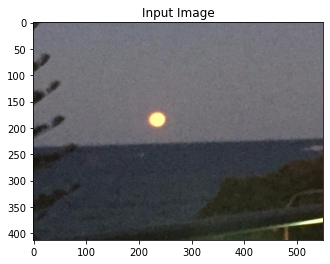

In [8]:
input_image = cv2.imread('data/test.jpg', )
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
# cv2.imshow('Input Image', input_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(input_image)
plt.title('Input Image')
plt.show()

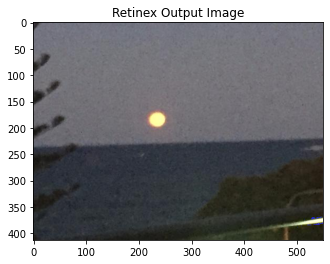

In [9]:
output_image = retinex_image_enhancement(input_image, 11)
# output_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
# cv2.imshow('Retinex Output Image', output_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(output_image + input_image)
plt.title('Retinex Output Image')
plt.show()

References:
1. https://github.com/aravindskrishnan/Retinex-Image-Enhancement/blob/master/retinex.py
2. https://github.com/dongb5/Retinex
3. https://github.com/adiMallya/retinex

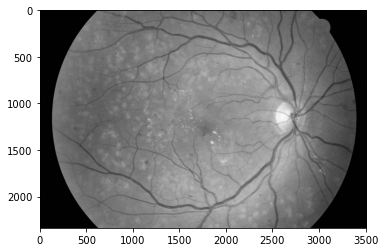

In [19]:
from skimage.filters import gaussian

def retinex_image_enhancement(image):
    image = image.astype(float)
    smoothed_image = gaussian(image, 11)
    division_image = np.divide(image, smoothed_image + 0.1)
    output_image = image + np.log(1 + division_image.astype(float))
    
    return output_image

plt.imshow(retinex_image_enhancement(input_image[:, :, 1]), cmap='gray')

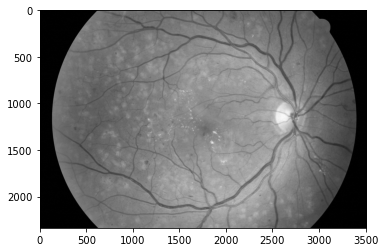

In [21]:
plt.imshow(input_image[:, :, 1], cmap='gray')